## Modules

In [10]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
import sklearn.model_selection as ms
import sklearn.decomposition as de
import csv
from sklearn import metrics
from sklearn.datasets import load_sample_image
from skimage import io as ioi
from sklearn.preprocessing import label_binarize
from mpl_toolkits.mplot3d import Axes3D
from skimage.util import crop
from skimage.color import rgb2gray
import glob
import array as arr



#Plot in cells
%matplotlib inline

In [2]:
!unzip '/content/images_training_rev1.zip' -d '/content/images_training_rev2'

Streaming output truncated to the last 5000 lines.
  inflating: /content/images_training_rev2/images_training_rev1/174391.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174395.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174409.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174414.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174422.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174437.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174440.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174444.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174462.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174490.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174543.jpg  
  inflating: /content/images_training_rev2/images_training_rev1/174550.jpg  
  inflating: /content/ima

## Load the .csv file and the images

In [3]:
# Load data from csv file
import os
data = pd.read_csv('/content/galaxy_zoo_labels.csv')

files = os.listdir('/content/images_training_rev2/images_training_rev1')
files.sort()


#samples
n=8000
# create a simple array with numpy empty() 
imgs = []
for i in files[:n]:
    
    img = ioi.imread('/content/images_training_rev2/images_training_rev1/'+i)
    im = img[110:310,110:310]
    img_gray = rgb2gray(im)
    imgs.append(img_gray)
    
imgs = np.array(imgs)

# Due to the large number of images, only taking 8000 images
data = data[:n]


## Converting the data into the classes

In [4]:
class1=[]
class2=[]
class3=[]
class4=[]
class5=[]
class6=[]
class7=[]
class8=[]
class9=[]
class10=[]
class11=[]

for i in range(len(data)):
    c1 = list(data.iloc[i][['Class1.1','Class1.2','Class1.3']])
    c2 = list(data.iloc[i][['Class2.1','Class2.2']])
    c3 = list(data.iloc[i][['Class3.1','Class3.2']])
    c4 = list(data.iloc[i][['Class4.1','Class4.2']])
    c5 = list(data.iloc[i][['Class5.1','Class5.2','Class5.3','Class5.4']])
    c6 = list(data.iloc[i][['Class6.1','Class6.2']])
    c7 = list(data.iloc[i][['Class7.1','Class7.2','Class7.3']])
    c8 = list(data.iloc[i][['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7']])
    c9 = list(data.iloc[i][['Class9.1', 'Class9.2', 'Class9.3']])
    c10 = list(data.iloc[i][['Class10.1', 'Class10.2', 'Class10.3']])
    c11 = list(data.iloc[i][['Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6']]) 
   
    class1.append((c1.index(max(c1))))
    class2.append((c2.index(max(c2))))
    class3.append((c3.index(max(c3))))
    class4.append((c4.index(max(c4))))
    class5.append((c5.index(max(c5))))
    class6.append((c6.index(max(c6))))
    class7.append((c7.index(max(c7))))
    class8.append((c8.index(max(c8))))
    class9.append((c9.index(max(c9))))
    class10.append((c10.index(max(c10))))
    class11.append((c11.index(max(c11))))

    
#print(np.sort(c1))

## Split the data and images

In [154]:

# Dividing the data set into three sets train, test, valid with the ratio of 0.2
test_ratio = 0.4
train_set, test_set, img_train, img_test = train_test_split(class3,imgs, test_size=test_ratio, random_state=160982)
train_set, valid_set, img_train, img_valid = train_test_split(train_set,img_train, test_size=test_ratio, random_state=160982)

## Reshaping the array

In [155]:
imtrain = img_train.reshape(img_train.shape[0],40000)
imtest = img_test.reshape(img_test.shape[0],40000)
imvalid = img_valid.reshape(img_valid.shape[0],40000)


## PCA dimension reduction

In [156]:
pca = de.PCA(0.96)
imtrainp = pca.fit_transform(imtrain)
imtestp  = pca.transform(imtest)
imvalidp  = pca.transform(imvalid)

#print(pca.n_components_)
#print(imtrainp.shape,imtestp.shape,imvalidp.shape)

## ML 

 ## SGD 

In [161]:
from sklearn.linear_model import SGDClassifier

#penalty: l2,l1,elasticnet

#loss: hinge
#clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=5)

#loss: log
clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=10)

#loss: modified_huber
#clf = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5)

clf.fit(imtrainp, train_set)

#Predict the response for test dataset
y_pred = clf.predict(imtestp)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [33]:
def accuracy(test_set,y_pred):
    j=0
    acc = np.array(test_set)

    for i in range(len(y_pred)):
    
        if y_pred[i] == acc[i] :
            j+=1
    return j,len(y_pred)
        
accuracy(test_set,y_pred)

(1539, 3200)

## Regularization

(1) In the kernel 'rbf', the regularization parameters are gamma, C which defines the margin. If we set C very small then it has very less accuracy. At intermediate value of it, it is showing the great accuracy and at higher it again decreases the accuracy. This is called overfitting. Thus, regularization is necessary to avoid the overfitting.

In [159]:
max_iter_range = [1,5,10,20,40,300]
#gamma_2d_range = [0.001,0.01,0.1,1,10]
penalty_range = ['elasticnet']
classifiers = []
for max_iter in max_iter_range:
    for penalty in penalty_range:
        clf = SGDClassifier(loss="hinge", penalty=penalty, max_iter=max_iter)
        clf.fit(imtrainp, train_set)
        y_pred = clf.predict(imtestp)
        accu = accuracy(test_set,y_pred)
        classifiers.append((max_iter, penalty, accu[0]/len(y_pred)))
        
print(classifiers)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[(1, 'elasticnet', 0.71625), (5, 'elasticnet', 0.764375), (10, 'elasticnet', 0.74), (20, 'elasticnet', 0.685625), (40, 'elasticnet', 0.74375), (300, 'elasticnet', 0.7496875)]


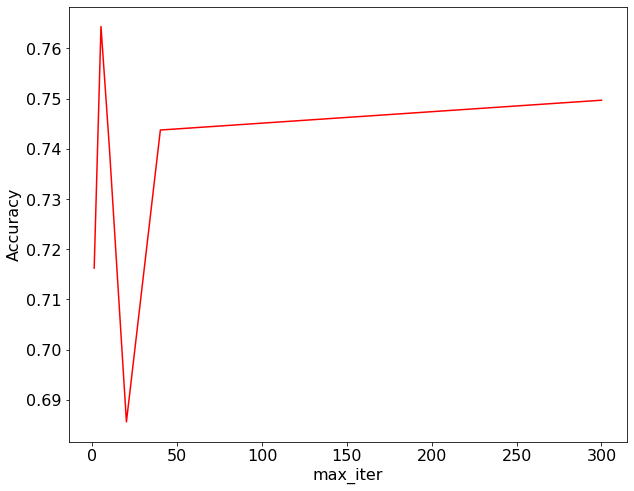

In [160]:
fig = plt.figure(figsize=(10,8))
x=[]
y=[]
z=[]
for i in range(len(classifiers)):
    x.append(classifiers[i][0])
    y.append(classifiers[i][1])
    z.append(classifiers[i][2])
    
plt.plot(x,z,color='r')
plt.xlabel('max_iter',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig("/content/Results/class3.png")
plt.show()

## Learning curve

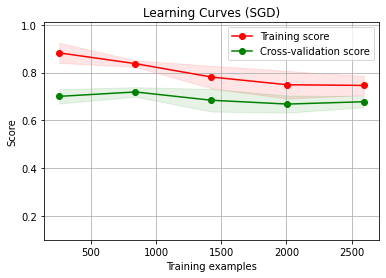

In [162]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves (SGD)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

estimator = clf
plot_learning_curve(estimator, title, imtrainp, train_set, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.savefig("/content/Results/lc_class3.png")

## Hyper-parameters using the validation set

In [157]:
# defining parameter range 
param_grid = {'max_iter': [ 5, 10, 20, 50],  
              'penalty': ['l1','l2','elasticnet'], 
              'loss': ['hinge','log','modified_huber']}  
  
grid = GridSearchCV(SGDClassifier(), param_grid, refit = True, verbose = 3);
  
# fitting the model for grid search 
grid.fit(imvalidp, valid_set);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l1, score=0.714, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l1, score=0.677, total=   0.1s
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l1, score=0.630, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l1, score=0.724, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l1 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/line

[CV] .. loss=hinge, max_iter=5, penalty=l1, score=0.656, total=   0.1s
[CV] loss=hinge, max_iter=5, penalty=l2 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l2, score=0.643, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l2 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l2, score=0.706, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l2 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l2, score=0.753, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l2 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l2, score=0.755, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=l2 ..............................
[CV] .. loss=hinge, max_iter=5, penalty=l2, score=0.714, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=elasticnet ......................
[CV]  loss=hinge, max_iter=5, penalty=elasticnet, score=0.695, total=   0.1s
[CV] loss=hinge, max_iter=5, penalty=elasticnet ......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=5, penalty=elasticnet, score=0.716, total=   0.1s
[CV] loss=hinge, max_iter=5, penalty=elasticnet ......................
[CV]  loss=hinge, max_iter=5, penalty=elasticnet, score=0.638, total=   0.0s
[CV] loss=hinge, max_iter=5, penalty=elasticnet ......................
[CV]  loss=hinge, max_iter=5, penalty=elasticnet, score=0.724, total=   0.1s
[CV] loss=hinge, max_iter=5, penalty=elasticnet ......................
[CV]  loss=hinge, max_iter=5, penalty=elasticnet, score=0.672, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=10, penalty=l1, score=0.706, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=l1 .............................
[CV] . loss=hinge, max_iter=10, penalty=l1, score=0.703, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=l1 .............................
[CV] . loss=hinge, max_iter=10, penalty=l1, score=0.714, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[CV] . loss=hinge, max_iter=10, penalty=l1, score=0.685, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=l1 .............................
[CV] . loss=hinge, max_iter=10, penalty=l1, score=0.646, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] . loss=hinge, max_iter=10, penalty=l2, score=0.701, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] . loss=hinge, max_iter=10, penalty=l2, score=0.633, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] . loss=hinge, max_iter=10, penalty=l2, score=0.682, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] . loss=hinge, max_iter=10, penalty=l2, score=0.711, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=l2 .............................
[CV] . loss=hinge, max_iter=10, penalty=l2, score=0.646, total=   0.0s
[CV] loss=hinge, max_iter=10, penalty=elasticnet .....................
[CV]  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[CV]  loss=hinge, max_iter=10, penalty=elasticnet, score=0.763, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=elasticnet .....................
[CV]  loss=hinge, max_iter=10, penalty=elasticnet, score=0.740, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=elasticnet .....................
[CV]  loss=hinge, max_iter=10, penalty=elasticnet, score=0.734, total=   0.1s
[CV] loss=hinge, max_iter=10, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=10, penalty=elasticnet, score=0.685, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l1 .............................
[CV] . loss=hinge, max_iter=20, penalty=l1, score=0.646, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=20, penalty=l1, score=0.656, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=l1 .............................
[CV] . loss=hinge, max_iter=20, penalty=l1, score=0.714, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=20, penalty=l1, score=0.698, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=l1 .............................
[CV] . loss=hinge, max_iter=20, penalty=l1, score=0.674, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l2 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=20, penalty=l2, score=0.688, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l2 .............................
[CV] . loss=hinge, max_iter=20, penalty=l2, score=0.693, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l2 .............................
[CV] . loss=hinge, max_iter=20, penalty=l2, score=0.698, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l2 .............................
[CV] . loss=hinge, max_iter=20, penalty=l2, score=0.711, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=l2 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=20, penalty=l2, score=0.669, total=   0.1s
[CV] loss=hinge, max_iter=20, penalty=elasticnet .....................
[CV]  loss=hinge, max_iter=20, penalty=elasticnet, score=0.690, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=20, penalty=elasticnet, score=0.682, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=elasticnet .....................
[CV]  loss=hinge, max_iter=20, penalty=elasticnet, score=0.732, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=20, penalty=elasticnet, score=0.724, total=   0.2s
[CV] loss=hinge, max_iter=20, penalty=elasticnet .....................
[CV]  loss=hinge, max_iter=20, penalty=elasticnet, score=0.714, total=   0.2s
[CV] loss=hinge, max_iter=50, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l1, score=0.633, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l1, score=0.693, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l1, score=0.724, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l1, score=0.672, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=l1 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l1, score=0.648, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=l2 .............................
[CV] . loss=hinge, max_iter=50, penalty=l2, score=0.690, total=   0.1s
[CV] loss=hinge, max_iter=50, penalty=l2 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l2, score=0.695, total=   0.1s
[CV] loss=hinge, max_iter=50, penalty=l2 .............................
[CV] . loss=hinge, max_iter=50, penalty=l2, score=0.737, total=   0.1s
[CV] loss=hinge, max_iter=50, penalty=l2 .............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] . loss=hinge, max_iter=50, penalty=l2, score=0.698, total=   0.1s
[CV] loss=hinge, max_iter=50, penalty=l2 .............................
[CV] . loss=hinge, max_iter=50, penalty=l2, score=0.633, total=   0.1s
[CV] loss=hinge, max_iter=50, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=50, penalty=elasticnet, score=0.625, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=50, penalty=elasticnet, score=0.698, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=50, penalty=elasticnet, score=0.742, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=50, penalty=elasticnet, score=0.708, total=   0.3s
[CV] loss=hinge, max_iter=50, penalty=elasticnet .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=hinge, max_iter=50, penalty=elasticnet, score=0.664, total=   0.3s
[CV] loss=log, max_iter=5, penalty=l1 ................................
[CV] .... loss=log, max_iter=5, penalty=l1, score=0.729, total=   0.1s
[CV] loss=log, max_iter=5, penalty=l1 ................................
[CV] .... loss=log, max_iter=5, penalty=l1, score=0.669, total=   0.1s
[CV] loss=log, max_iter=5, penalty=l1 ................................
[CV] .... loss=log, max_iter=5, penalty=l1, score=0.719, total=   0.1s
[CV] loss=log, max_iter=5, penalty=l1 ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[CV] .... loss=log, max_iter=5, penalty=l1, score=0.695, total=   0.1s
[CV] loss=log, max_iter=5, penalty=l1 ................................
[CV] .... loss=log, max_iter=5, penalty=l1, score=0.693, total=   0.1s
[CV] loss=log, max_iter=5, penalty=l2 ................................
[CV] .... loss=log, max_iter=5, penalty=l2, score=0.674, total=   0.0s
[CV] loss=log, max_iter=5, penalty=l2 ................................
[CV] .... loss=log, max_iter=5, penalty=l2, score=0.758, total=   0.0s
[CV] loss=log, max_iter=5, penalty=l2 ................................
[CV] .... loss=log, max_iter=5, penalty=l2, score=0.695, total=   0.0s
[CV] loss=log, max_iter=5, penalty=l2 ................................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] .... loss=log, max_iter=5, penalty=l2, score=0.768, total=   0.0s
[CV] loss=log, max_iter=5, penalty=l2 ................................
[CV] .... loss=log, max_iter=5, penalty=l2, score=0.661, total=   0.0s
[CV] loss=log, max_iter=5, penalty=elasticnet ........................
[CV]  loss=log, max_iter=5, penalty=elasticnet, score=0.680, total=   0.1s
[CV] loss=log, max_iter=5, penalty=elasticnet ........................
[CV]  loss=log, max_iter=5, penalty=elasticnet, score=0.693, total=   0.1s
[CV] loss=log, max_iter=5, penalty=elasticnet ........................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=5, penalty=elasticnet, score=0.656, total=   0.1s
[CV] loss=log, max_iter=5, penalty=elasticnet ........................
[CV]  loss=log, max_iter=5, penalty=elasticnet, score=0.615, total=   0.1s
[CV] loss=log, max_iter=5, penalty=elasticnet ........................
[CV]  loss=log, max_iter=5, penalty=elasticnet, score=0.708, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=10, penalty=l1, score=0.672, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] ... loss=log, max_iter=10, penalty=l1, score=0.674, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=10, penalty=l1, score=0.714, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l1 ...............................
[CV] ... loss=log, max_iter=10, penalty=l1, score=0.706, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=10, penalty=l1, score=0.690, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l2 ...............................
[CV] ... loss=log, max_iter=10, penalty=l2, score=0.656, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l2 ...............................
[CV] ... loss=log, max_iter=10, penalty=l2, score=0.680, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l2 ...............................
[CV] ... loss=log, max_iter=10, penalty=l2, score=0.661, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l2 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=10, penalty=l2, score=0.742, total=   0.1s
[CV] loss=log, max_iter=10, penalty=l2 ...............................
[CV] ... loss=log, max_iter=10, penalty=l2, score=0.521, total=   0.1s
[CV] loss=log, max_iter=10, penalty=elasticnet .......................
[CV]  loss=log, max_iter=10, penalty=elasticnet, score=0.721, total=   0.1s
[CV] loss=log, max_iter=10, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=10, penalty=elasticnet, score=0.711, total=   0.1s
[CV] loss=log, max_iter=10, penalty=elasticnet .......................
[CV]  loss=log, max_iter=10, penalty=elasticnet, score=0.688, total=   0.1s
[CV] loss=log, max_iter=10, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=10, penalty=elasticnet, score=0.674, total=   0.1s
[CV] loss=log, max_iter=10, penalty=elasticnet .......................
[CV]  loss=log, max_iter=10, penalty=elasticnet, score=0.716, total=   0.1s
[CV] loss=log, max_iter=20, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=20, penalty=l1, score=0.646, total=   0.2s
[CV] loss=log, max_iter=20, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=20, penalty=l1, score=0.674, total=   0.2s
[CV] loss=log, max_iter=20, penalty=l1 ...............................
[CV] ... loss=log, max_iter=20, penalty=l1, score=0.724, total=   0.2s
[CV] loss=log, max_iter=20, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=20, penalty=l1, score=0.674, total=   0.2s
[CV] loss=log, max_iter=20, penalty=l1 ...............................
[CV] ... loss=log, max_iter=20, penalty=l1, score=0.617, total=   0.2s
[CV] loss=log, max_iter=20, penalty=l2 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=20, penalty=l2, score=0.628, total=   0.1s
[CV] loss=log, max_iter=20, penalty=l2 ...............................
[CV] ... loss=log, max_iter=20, penalty=l2, score=0.729, total=   0.1s
[CV] loss=log, max_iter=20, penalty=l2 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=20, penalty=l2, score=0.661, total=   0.1s
[CV] loss=log, max_iter=20, penalty=l2 ...............................
[CV] ... loss=log, max_iter=20, penalty=l2, score=0.737, total=   0.1s
[CV] loss=log, max_iter=20, penalty=l2 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=20, penalty=l2, score=0.669, total=   0.1s
[CV] loss=log, max_iter=20, penalty=elasticnet .......................
[CV]  loss=log, max_iter=20, penalty=elasticnet, score=0.685, total=   0.2s
[CV] loss=log, max_iter=20, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=20, penalty=elasticnet, score=0.693, total=   0.2s
[CV] loss=log, max_iter=20, penalty=elasticnet .......................
[CV]  loss=log, max_iter=20, penalty=elasticnet, score=0.763, total=   0.2s
[CV] loss=log, max_iter=20, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=20, penalty=elasticnet, score=0.732, total=   0.2s
[CV] loss=log, max_iter=20, penalty=elasticnet .......................
[CV]  loss=log, max_iter=20, penalty=elasticnet, score=0.635, total=   0.2s
[CV] loss=log, max_iter=50, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l1, score=0.630, total=   0.4s
[CV] loss=log, max_iter=50, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l1, score=0.651, total=   0.4s
[CV] loss=log, max_iter=50, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l1, score=0.727, total=   0.4s
[CV] loss=log, max_iter=50, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l1, score=0.674, total=   0.4s
[CV] loss=log, max_iter=50, penalty=l1 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l1, score=0.648, total=   0.4s
[CV] loss=log, max_iter=50, penalty=l2 ...............................
[CV] ... loss=log, max_iter=50, penalty=l2, score=0.654, total=   0.2s
[CV] loss=log, max_iter=50, penalty=l2 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l2, score=0.695, total=   0.2s
[CV] loss=log, max_iter=50, penalty=l2 ...............................
[CV] ... loss=log, max_iter=50, penalty=l2, score=0.674, total=   0.2s
[CV] loss=log, max_iter=50, penalty=l2 ...............................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV] ... loss=log, max_iter=50, penalty=l2, score=0.706, total=   0.2s
[CV] loss=log, max_iter=50, penalty=l2 ...............................
[CV] ... loss=log, max_iter=50, penalty=l2, score=0.685, total=   0.2s
[CV] loss=log, max_iter=50, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=50, penalty=elasticnet, score=0.656, total=   0.4s
[CV] loss=log, max_iter=50, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=50, penalty=elasticnet, score=0.667, total=   0.4s
[CV] loss=log, max_iter=50, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=50, penalty=elasticnet, score=0.656, total=   0.4s
[CV] loss=log, max_iter=50, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=log, max_iter=50, penalty=elasticnet, score=0.654, total=   0.4s
[CV] loss=log, max_iter=50, penalty=elasticnet .......................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[CV]  loss=log, max_iter=50, penalty=elasticnet, score=0.635, total=   0.4s
[CV] loss=modified_huber, max_iter=5, penalty=l1 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l1, score=0.677, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l1 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l1, score=0.724, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l1 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l1, score=0.729, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l1 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l1, score=0.688, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l1 .....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[CV]  loss=modified_huber, max_iter=5, penalty=l1, score=0.701, total=   0.1s
[CV] loss=modified_huber, max_iter=5, penalty=l2 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l2, score=0.698, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l2 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l2, score=0.768, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l2 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l2, score=0.745, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l2 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l2, score=0.747, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=l2 .....................
[CV]  loss=modified_huber, max_iter=5, penalty=l2, score=0.604, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=elasticnet .............
[CV]  loss=modified_huber, max_iter=5, penalty=elasticnet, score=0.669, total=   0.0s
[CV] loss=modified_h

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=5, penalty=elasticnet, score=0.643, total=   0.1s
[CV] loss=modified_huber, max_iter=5, penalty=elasticnet .............
[CV]  loss=modified_huber, max_iter=5, penalty=elasticnet, score=0.594, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=elasticnet .............
[CV]  loss=modified_huber, max_iter=5, penalty=elasticnet, score=0.721, total=   0.0s
[CV] loss=modified_huber, max_iter=5, penalty=elasticnet .............
[CV]  loss=modified_huber, max_iter=5, penalty=elasticnet, score=0.768, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=10, penalty=l1, score=0.680, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=l1 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l1, score=0.664, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=l1 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l1, score=0.703, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

[CV]  loss=modified_huber, max_iter=10, penalty=l1, score=0.727, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=l1 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l1, score=0.690, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l2, score=0.667, total=   0.0s
[CV] loss=modified_huber, max_iter=10, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l2, score=0.677, total=   0.0s
[CV] loss=modified_huber, max_iter=10, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l2, score=0.768, total=   0.0s
[CV] loss=modified_huber, max_iter=10, penalty=l2 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=10, penalty=l2, score=0.721, total=   0.0s
[CV] loss=modified_huber, max_iter=10, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=10, penalty=l2, score=0.612, total=   0.0s
[CV] loss=modified_huber, max_iter=10, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=10, penalty=elasticnet, score=0.643, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=10, penalty=elasticnet, score=0.695, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=10, penalty=elasticnet, score=0.714, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=10, penalty=elasticnet, score=0.680, total=   0.1s
[CV] loss=modified_huber, max_iter=10, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=10, penalty=elasticnet, score=0.732, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l1 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l1, score=0.656, total=   0.2s
[CV] loss=modified_huber, max_iter=20, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=20, penalty=l1, score=0.682, total=   0.2s
[CV] loss=modified_huber, max_iter=20, penalty=l1 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l1, score=0.719, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=20, penalty=l1, score=0.708, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l1 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l1, score=0.651, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l2, score=0.701, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l2 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=20, penalty=l2, score=0.617, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l2, score=0.719, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l2, score=0.617, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=20, penalty=l2, score=0.688, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=20, penalty=elasticnet, score=0.651, total=   0.2s
[CV] loss=modified_huber, max_iter=20, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=20, penalty=elasticnet, score=0.698, total=   0.2s
[CV] loss=modified_huber, max_iter=20, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=20, penalty=elasticnet, score=0.760, total=   0.2s
[CV] loss=modified_huber, max_iter=20, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=20, penalty=elasticnet, score=0.740, total=   0.1s
[CV] loss=modified_huber, max_iter=20, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=20, penalty=elasticnet, score=0.714, total=   0.2s
[CV] loss=modified_huber, max_iter=50, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l1, score=0.641, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l1, score=0.664, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l1, score=0.714, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l1, score=0.654, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=l1 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l1, score=0.630, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=50, penalty=l2, score=0.672, total=   0.1s
[CV] loss=modified_huber, max_iter=50, penalty=l2 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l2, score=0.685, total=   0.1s
[CV] loss=modified_huber, max_iter=50, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=50, penalty=l2, score=0.711, total=   0.1s
[CV] loss=modified_huber, max_iter=50, penalty=l2 ....................


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=l2, score=0.703, total=   0.1s
[CV] loss=modified_huber, max_iter=50, penalty=l2 ....................
[CV]  loss=modified_huber, max_iter=50, penalty=l2, score=0.701, total=   0.1s
[CV] loss=modified_huber, max_iter=50, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=elasticnet, score=0.667, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=50, penalty=elasticnet, score=0.690, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=elasticnet ............


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


[CV]  loss=modified_huber, max_iter=50, penalty=elasticnet, score=0.708, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=50, penalty=elasticnet, score=0.685, total=   0.3s
[CV] loss=modified_huber, max_iter=50, penalty=elasticnet ............
[CV]  loss=modified_huber, max_iter=50, penalty=elasticnet, score=0.656, total=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   24.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [158]:


# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

print((grid.best_score_))

{'loss': 'hinge', 'max_iter': 10, 'penalty': 'elasticnet'}
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.7276041666666667


## Precision vs Recall 

In [163]:
print(confusion_matrix(test_set,y_pred))
print(classification_report(test_set,y_pred))

[[  87  516]
 [ 331 2266]]
              precision    recall  f1-score   support

           0       0.21      0.14      0.17       603
           1       0.81      0.87      0.84      2597

    accuracy                           0.74      3200
   macro avg       0.51      0.51      0.51      3200
weighted avg       0.70      0.74      0.72      3200



## ROC Curve


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


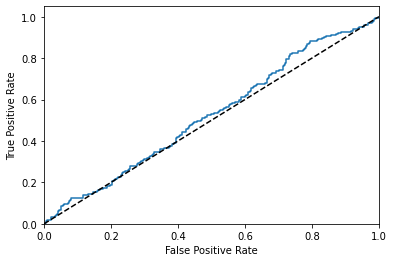

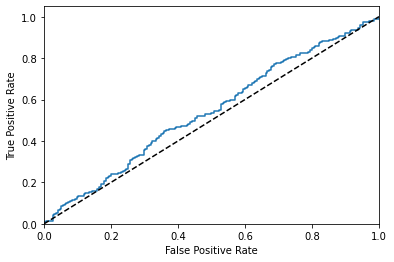

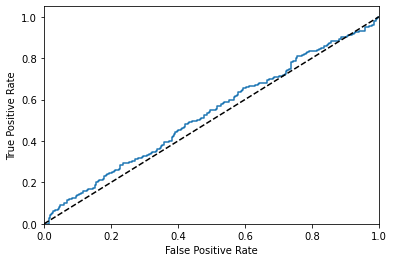

In [164]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt


X=imtrainp
y=train_set

y = label_binarize(y, classes=[0,1,0])
n_classes = 3

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.33, random_state=0)

# classifier
clf = OneVsRestClassifier(clf)
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

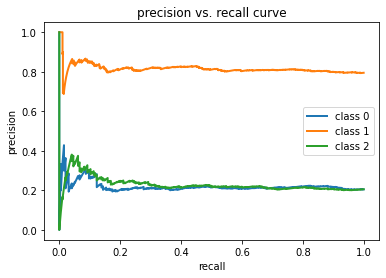

In [165]:
from sklearn.metrics import precision_recall_curve, roc_curve
# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.savefig('/content/Results/precision_class3')
plt.show()

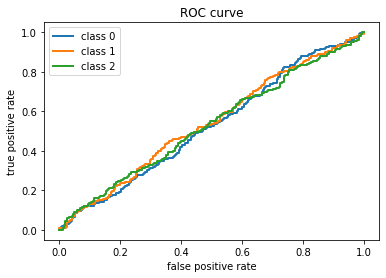

In [166]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],
                                  y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.savefig('/content/Results/roc_class3')
plt.show()

## Final score

In [167]:
from sklearn.metrics import f1_score
print('The final score is :',f1_score(test_set, y_pred, average='weighted'))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_set, y_pred))


# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_set, y_pred,average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_set, y_pred,average='weighted'))

The final score is : 0.7158841864305614
Accuracy: 0.7353125
Precision: 0.7002556963296171
Recall: 0.7353125
